In [49]:
import numpy as np
import math as mp
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
gamma = 1
eta = 0.5
sigma = 5
beta_hh = 0.99
r = 0.01
beta = 1 /( 1.0 +r)
beta1 =1/( (1.0 +r* np.exp(30/(36.5*0.9)))) 
W = 1
power = -((1+eta)/(gamma+eta))

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/2291322681.py:6: RuntimeWarning: divide by zero encountered in log
  N = -(data_tau) - 1/np.log(beta*c)
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/2291322681.py:7: RuntimeWarning: divide by zero encountered in log
  tau1= -1/np.log(beta*c) - N
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/2291322681.py:9: RuntimeWarning: divide by zero encountered in log
  tau2= -1/np.log(beta1*c) - N


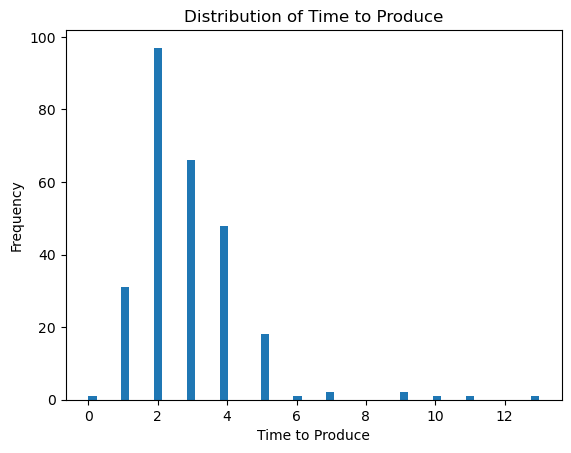

In [51]:
data=pd.read_csv('APP_data_usa_goods.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data_tau=(data['invtCogsRatio']* 36.5/(30*0.1))
tau_diff = np.zeros(( 1000,1))
i = 0
for c in np.linspace(0, 0.99, 1000): 
    N = -(data_tau) - 1/np.log(beta*c) 
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0     
    tau2= -1/np.log(beta1*c) - N
    tau2[tau2<0] = 0    
    tau_diff[i] = np.mean(np.abs(tau1-tau2))
    i = i+1

min_val = np.min(np.abs(tau_diff-1))
argmins = np.where(np.abs(tau_diff-1) == min_val)[0]
argmins
c_list = np.linspace(0, 0.99, 1000)
c=c_list[argmins]
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  
tprod = (beta*c)**tau * (tau + N)
plt.hist(tau, bins = 55, alpha=1, label='tau_noise')
plt.xlabel('Time to Produce')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Produce')
plt.show()
tau = np.array(tau, dtype=int)

In [52]:

def consumption_function(P, theta):
    return (P)**power * theta**(1/(gamma+eta))
def euler_equation(P_0, P_1, theta_0, theta_1, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1, theta_1) / consumption_function(P_0, theta_0))**((gamma))
    price_growth_comp = (P_0 / P_1)* (theta_1/theta_0)
    wage_inflation = 1/(consumption_growth_comp / (price_growth_comp *  (beta_hh *   (1+r)) ))
    return wage_inflation
def price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r):
    consumption_growth_comp = (consumption_function(P_1,theta_1) / consumption_function(P_0, theta_0))**((gamma)) * (theta_1/theta_0)
    constants = (beta_hh * (1+r))
    price_inflation = 1/ (consumption_growth_comp / constants)
    return price_inflation

In [53]:
grid_point = 200
r_arrange = np.linspace(0.00, 0.01, grid_point)
P = np.zeros((20, grid_point))
k=0
tau_list = {}
index_diff_list = {}
for r in r_arrange: 
    beta_org = (1 / (1 + 0.01))*c
    tau= -1/np.log(beta_org) - N
    tau[tau<0] = 0  
    tau_floor = np.floor(tau)
    tau_ceil = np.ceil(tau)
    tprod_ceil=  beta_org**tau_ceil * (tau_ceil + N)
    tprod_floor=  beta_org**tau_floor * (tau_floor + N)
    tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
    tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
    tau[tau<0] = 0 
    tprod1=  np.array(beta_org**tau * (tau + N) )  
    P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma)) 

    beta_rep = (1 / (1 + r))*c
    tau_rep= -1/np.log(beta_rep) - N
    tau_rep[tau_rep<0] = 0  
    tau_rep_floor = np.floor(tau_rep)
    tau_rep_ceil = np.ceil(tau_rep)
    tprod_ceil=  beta_rep**tau_rep_ceil * (tau_rep_ceil + N)
    tprod_floor=  beta_rep**tau_rep_floor * (tau_rep_floor + N)
    tau_rep[(tprod_ceil-tprod_floor)>0] = tau_rep_ceil[(tprod_ceil-tprod_floor)>0]
    tau_rep[(tprod_ceil-tprod_floor)<0] = tau_rep_floor[(tprod_ceil-tprod_floor)<0]
    tau_rep[tau_rep<0] = 0 
    tprod_rep=  np.array(beta_rep**tau_rep * (tau_rep + N) )  
    P1 = (np.sum(1/(tprod_rep)**(1-sigma)))**(1/(1-sigma)) 

    P[0, k] = P0
    tau_list[k] = np.array(tau_rep)
    tau = tau.sort_values()
    tau_rep = tau.sort_values()
    diff = tau-tau_rep
    index_diff=tau_rep[diff !=0].index
    index_diff_list[k] = np.sum(index_diff!=0)

    for j in range(0, int(np.max(tau_rep)) + 1):
        tau1_temp = pd.Series(tau[tau > j])
        tau2_temp = pd.Series(tau_rep[tau_rep <= j])

        tau1_temp_df = tau1_temp.to_frame(name='t')
        tau1_temp_df['source'] = 'org'

        tau2_temp_df = tau2_temp.to_frame(name='t')
        tau2_temp_df['source'] = 'rep'

        t_temp = pd.concat([tau1_temp_df, tau2_temp_df])

        dup_indices = t_temp.index[t_temp.index.duplicated(keep=False)].unique()

        keep_rows = []

        for i in dup_indices:
            rows = t_temp.loc[[i]]
            N_temp = N.loc[[i]]
            t_org = rows[rows['source'] == 'org']['t'].values[0]
            t_rep = rows[rows['source'] == 'rep']['t'].values[0]

            tprod_org_temp = beta_org**t_org * (t_org + N_temp)
            tprod_rep_temp = beta_rep**t_rep * (t_rep + N_temp)
            if i ==j:
                tprod_rep_temp = 1.0*beta_rep**t_rep * (t_rep + N_temp)

            # Keep only the row with the higher value
            if tprod_org_temp.values >= tprod_rep_temp.values:
                keep_rows.append(rows[rows['source'] == 'org'])
            else:
                keep_rows.append(rows[rows['source'] == 'rep'])

        # Drop all duplicates first
        t_temp = t_temp[~t_temp.index.isin(dup_indices)]

        # Add back only the best ones
        if keep_rows:
            t_temp = pd.concat([t_temp] + keep_rows)
        t_temp['N'] = N.loc[t_temp.index].values

        # Step 1: Add matching N values
        t_temp['N'] = N.loc[t_temp.index].values  # will align correctly by NAICS6 index

        # Step 2: Compute t_prod using vectorized logic
        beta_vec = t_temp['source'].map({'org': beta_org, 'rep': beta_rep})
        A_vec = np.where((t_temp['source'] == 'rep') & (t_temp['t'] == j), 1.0, 1.0)
        t_temp['A'] = A_vec
        t_temp['t_prod'] = A_vec * beta_vec ** t_temp['t'] * (t_temp['t'] + t_temp['N'])
        
        tprod_temp = t_temp['t_prod'].values
        P[j + 1, k] = (np.sum(1 / (tprod_temp ** (1 - sigma)))) ** (1 / (1 - sigma))
    P[j+1, k] = P1

    k = k+1
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [79]:
k=0
deviation_gap = np.zeros((grid_point, 1))
for r in r_arrange: 
    P_temp = P[:,k]
    P_temp_no_zeros = P_temp[P_temp != 0]
    Y = np.zeros((len(P_temp_no_zeros), 1))
    
    theta_list = np.ones_like(P_temp_no_zeros)
    theta_list[1] = 0.9
    

    for j in range(len(theta_list)):
        Y[j] = consumption_function(P_temp_no_zeros[j], theta_list[j])
    Y[1:] = Y[1:]/ Y[0]
    wage_inflation = np.zeros(len(P_temp_no_zeros)-1)

    for i in range(len(theta_list)-1):
        P_0 = P_temp_no_zeros[i]
        P_1 = P_temp_no_zeros[i+1]
        theta_0 = theta_list[i]
        theta_1 = theta_list[i+1]
        wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)

    deviation_gap[k] = np.sum((Y - 1 )**2) + np.sum((wage_inflation- 1 )**2) 
    k = k+1

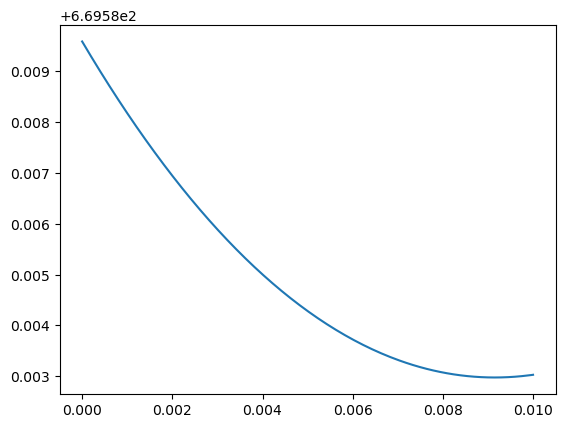

In [80]:
plt.plot(r_arrange,deviation_gap)
plt.show()

In [81]:
argmins_gap = np.where(deviation_gap == np.min(deviation_gap))[0]
r_arrange[argmins_gap]

array([0.00914573])

In [57]:
consumption = np.zeros((len(P[:,argmins_gap]), 1))
theta_list = np.ones_like(P[:,argmins_gap])
theta_list[1] = 0.7
consumption[0] = consumption_function(P[0,argmins_gap], theta_list[0])
for i in range(1, len(theta_list)):
    consumption[i] = consumption_function(P[i,argmins_gap], theta_list[i])

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))


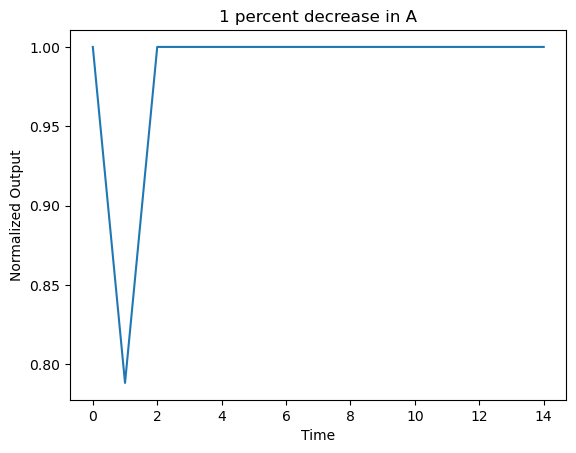

In [58]:
plt.plot( consumption[:15] / consumption[0])
plt.title('1 percent decrease in A')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()

In [59]:
wage_inflation = np.zeros(len(P[:,argmins_gap])-1)
theta_list = np.ones_like(P[:,argmins_gap])
theta_list[1] = 0.7
for i in range(len(P[:,argmins_gap])-1):
    P_0 = P[:,argmins_gap][i]
    P_1 = P[:,argmins_gap][i+1]
    theta_0 = theta_list[i]
    theta_1 = theta_list[i+1]
    wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/850672584.py:9: RuntimeWarning: invalid value encountered in divide
  consumption_growth_comp = (consumption_function(P_1,theta_1) / consumption_function(P_0, theta_0))**((gamma)) * (theta_1/theta_0)


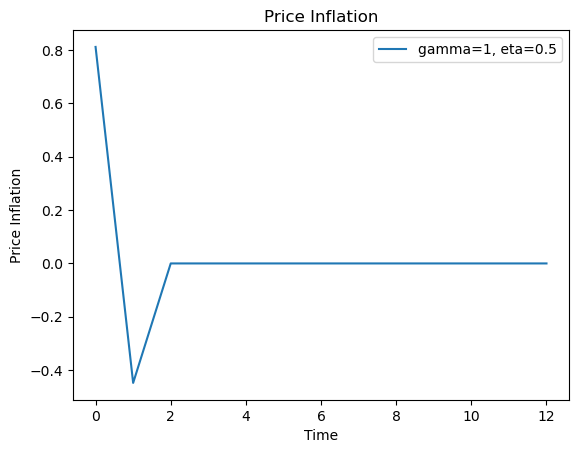

In [60]:
plt.plot(wage_inflation[:13]-1, label=f'gamma={gamma}, eta={eta}')
plt.title('Price Inflation')
plt.xlabel('Time')
plt.ylabel('Price Inflation')
plt.legend()
plt.show()

In [61]:
k=0
deviation_gap_inflation = np.zeros((grid_point, 1))
for r in r_arrange: 
    P_temp = P[:,k]
    P_temp_no_zeros = P_temp[P_temp != 0]
    Y = np.zeros((len(P_temp_no_zeros), 1))
    
    theta_list = np.ones_like(P_temp_no_zeros)
    theta_list[1] = 0.97


    for j in range(len(theta_list)):
        Y[j] = consumption_function(P_temp_no_zeros[j], theta_list[j])
    Y[1:] = Y[1:]/ Y[0]
    wage_inflation = np.zeros(len(P_temp_no_zeros)-1)

    for i in range(len(theta_list)-1):
        P_0 = P_temp_no_zeros[i]
        P_1 = P_temp_no_zeros[i+1]
        theta_0 = theta_list[i]
        theta_1 = theta_list[i+1]
        wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)

    deviation_gap_inflation[k] = np.sum((wage_inflation- 1 )**2) 
    k = k+1

In [62]:
k=0
deviation_gap_output = np.zeros((grid_point, 1))
for r in r_arrange: 
    P_temp = P[:,k]
    P_temp_no_zeros = P_temp[P_temp != 0]
    Y = np.zeros((len(P_temp_no_zeros), 1))
    
    theta_list = np.ones_like(P_temp_no_zeros)
    theta_list[1] = 0.97


    for j in range(len(theta_list)):
        Y[j] = consumption_function(P_temp_no_zeros[j], theta_list[j])
    Y[1:] = Y[1:]/ Y[0]
    wage_inflation = np.zeros(len(P_temp_no_zeros)-1)

    for i in range(len(theta_list)-1):
        P_0 = P_temp_no_zeros[i]
        P_1 = P_temp_no_zeros[i+1]
        theta_0 = theta_list[i]
        theta_1 = theta_list[i+1]
        wage_inflation[i] =     price_inflation_ee(P_0, P_1, theta_1, theta_0, beta_hh, r)

    deviation_gap_output[k] =  np.sum((Y - 1 )**2)
    k = k+1

In [63]:
argmins_gap = np.where(deviation_gap == np.min(deviation_gap))[0]
argmins_gap_output = np.where(deviation_gap_output == np.min(deviation_gap_output))[0]
argmins_gap_inflation = np.where(deviation_gap_inflation == np.min(deviation_gap_inflation))[0]

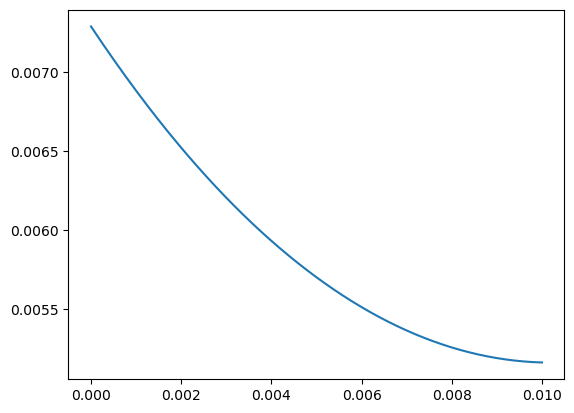

In [64]:
plt.plot(r_arrange,deviation_gap_inflation)
plt.show()

In [65]:
print(r_arrange[argmins_gap])
print(r_arrange[argmins_gap_output])
print(r_arrange[argmins_gap_inflation])

[0.01]
[0.01]
[0.01]


In [66]:
consumption = np.zeros((len(P[:,argmins_gap]), 1))
theta_list = np.ones_like(P[:,argmins_gap])
theta_list[1] = 0.97
consumption[0] = consumption_function(P[0,argmins_gap], theta_list[0])
for i in range(1, len(theta_list)):
    consumption[i] = consumption_function(P[i,argmins_gap], theta_list[i])

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))


In [67]:
consumption_output = np.zeros((len(P[:,argmins_gap_output]), 1))
theta_list_output = np.ones_like(P[:,argmins_gap_output])
theta_list_output[1] = 0.97
consumption_output[0] = consumption_function(P[0,argmins_gap_output], theta_list_output[0])
for i in range(1, len(theta_list_output)):
    consumption_output[i] = consumption_function(P[i,argmins_gap_output], theta_list_output[i])

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))


In [68]:
consumption_inflation = np.zeros((len(P[:,argmins_gap_inflation]), 1))
theta_list_inflation = np.ones_like(P[:,argmins_gap_inflation])     
theta_list_inflation[1] = 0.97
consumption_inflation[0] = consumption_function(P[0,argmins_gap_inflation], theta_list_inflation[0])
for i in range(1, len(theta_list_inflation)):
    consumption_inflation[i] = consumption_function(P[i,argmins_gap_inflation], theta_list_inflation[i])

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_18542/850672584.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (P)**power * theta**(1/(gamma+eta))


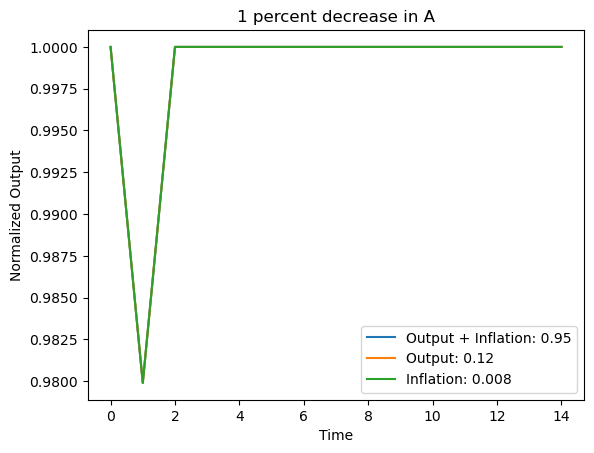

In [69]:
plt.plot(consumption[:15] / consumption[0])
plt.plot(consumption_output[:15] / consumption_output[0])
plt.plot(consumption_inflation[:15] / consumption_inflation[0])
plt.legend(['Output + Inflation: 0.95', 'Output: 0.12', 'Inflation: 0.008'])

plt.title('1 percent decrease in A')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()